---
# data pps

In [186]:
import os
import json
from typing import List, Union

def load_jsonl(fpath:str) -> List[Union[dict, list]]:
    with open(fpath, 'r') as f:
        data = f.readlines()
    data = [json.loads(x) for x in data]
    return data

In [187]:
data = load_jsonl('./rlhf-data-1.1.jsonl')

In [188]:
# 인덱스 0 추가
data = [{}] + data

In [189]:
data[0], data[1]

({},
 {'instruction': '양파는 어떤 식물 부위인가요? 그리고 고구마는 뿌리인가요?',
  'input': '',
  'output': ['양파는 잎이 아닌 식물의 줄기 부분입니다. 고구마는 식물의 뿌리 부분입니다. \n\n식물의 부위의 구분에 대해 궁금해하는 분이라면 분명 이 질문에 대한 답을 찾고 있을 것입니다. 양파는 잎이 아닌 줄기 부분입니다. 고구마는 다른 질문과 답변에서 언급된 것과 같이 뿌리 부분입니다. 따라서, 양파는 식물의 줄기 부분이 되고, 고구마는 식물의 뿌리 부분입니다.\n\n 덧붙이는 답변: 고구마 줄기도 볶아먹을 수 있나요? \n\n고구마 줄기도 식용으로 볶아먹을 수 있습니다. 하지만 줄기 뿐만 아니라, 잎, 씨, 뿌리까지 모든 부위가 식용으로 활용되기도 합니다. 다만, 한국에서는 일반적으로 뿌리 부분인 고구마를 주로 먹습니다.',
   '양파는 백합과, 구근식물인 구근뿌리채소입니다.',
   '양파는 식물의 한 부위이며, 고구마는 뿌리입니다.']})

In [190]:
len(data)

21151

In [191]:
# load chat-gpt gen data

fpath = './rlhf-data-1.1-gpt-3.5-turbo.txt'
with open(fpath, 'r') as f:
    aa = f.readlines()

In [192]:
len(aa)

84521

In [193]:
aa[-4]

'\n'

In [194]:
# 빈 라인 처리
xx = map(lambda x: x.strip(), aa)
xx = list(filter(lambda x: x!='', xx))

In [195]:
len(xx)

55824

In [196]:
import re
from tqdm.auto import tqdm

In [197]:
# 정규식 패턴
p = re.compile(r'>>>(\d+)\n')

# 다시 텍스트로 병합
tt = '\n'.join(xx)

In [198]:
# 중복 인덱스 체크 
from collections import Counter

cc= Counter(p.findall(tt))
cc.most_common()

[('1', 1),
 ('2', 1),
 ('3', 1),
 ('4', 1),
 ('5', 1),
 ('6', 1),
 ('7', 1),
 ('8', 1),
 ('9', 1),
 ('10', 1),
 ('11', 1),
 ('21', 1),
 ('22', 1),
 ('23', 1),
 ('24', 1),
 ('25', 1),
 ('26', 1),
 ('27', 1),
 ('28', 1),
 ('29', 1),
 ('30', 1),
 ('31', 1),
 ('32', 1),
 ('33', 1),
 ('34', 1),
 ('35', 1),
 ('36', 1),
 ('37', 1),
 ('38', 1),
 ('39', 1),
 ('40', 1),
 ('41', 1),
 ('42', 1),
 ('43', 1),
 ('44', 1),
 ('45', 1),
 ('46', 1),
 ('47', 1),
 ('48', 1),
 ('49', 1),
 ('50', 1),
 ('51', 1),
 ('52', 1),
 ('53', 1),
 ('54', 1),
 ('55', 1),
 ('56', 1),
 ('57', 1),
 ('58', 1),
 ('59', 1),
 ('60', 1),
 ('61', 1),
 ('62', 1),
 ('63', 1),
 ('64', 1),
 ('65', 1),
 ('66', 1),
 ('67', 1),
 ('68', 1),
 ('69', 1),
 ('70', 1),
 ('71', 1),
 ('81', 1),
 ('82', 1),
 ('83', 1),
 ('84', 1),
 ('85', 1),
 ('86', 1),
 ('87', 1),
 ('88', 1),
 ('89', 1),
 ('90', 1),
 ('91', 1),
 ('92', 1),
 ('93', 1),
 ('94', 1),
 ('95', 1),
 ('96', 1),
 ('97', 1),
 ('98', 1),
 ('99', 1),
 ('100', 1),
 ('101', 1),
 ('102', 1)

In [199]:
res = [{'idx':i} for i in range(len(data))]
# res = {k:v for k, v in enumerate(res)}
prev_idx = 0
prev_end = 0
i = 0
for m in tqdm(p.finditer(tt)):
    # print(m)
    curr_idx = int(m.groups()[0])
    if curr_idx > len(res): continue
    
    
    if prev_idx>0:
        pr = res[prev_idx].get('answer', [])
        cont = tt[prev_end:m.start()] if i < len(res) -1 else tt[prev_end:]
        # pps 및 필터 여기에
        # ...
        res[prev_idx].update({'answer': pr + [cont]})
    
    prev_idx = curr_idx
    prev_end = m.end()
    i += 1

0it [00:00, ?it/s]

In [200]:
data[104]

{'instruction': '엑스레이 사진을 찍을때 왜 귀걸이나 목걸이를 빼야 하는 건가요?\n치과나 병원에서 엑스레이 사진을 찍을때 귀걸이와 목걸이 등 금속물을 반드시 벗겨야 하는 이유가 궁금해요.',
 'input': '',
 'output': ['엑스레이 사진은 전자를 물체에 쏘아 물질을 투과한 후 나머지 전자들로 현상되는 원리를 이용해 사진을 찍습니다. 하지만 금속물은 밀도가 크기 때문에 거의 뚫고 나오는 전자가 없어 엑스레이 사진에서 하얗게 나타나게 됩니다. 따라서 이물질을 제거하지 않으면 해당 부위를 진단하기 어렵습니다. 또한 치아와 주변 조직, 합병증 등을 알아보기 위해 필요한 부분까지 가리면 사진의 진단에 희색음영을 불러일으키는 경우가 있습니다. 그러므로 금속물을 제거해 정확한 진단을 받을 수 있도록 해야 합니다.',
  '치과에서는 방사선 노출을 줄이기 위해 환자의 주의를 환기시키기 위해 액세서리를 빼도록 합니다.',
  '"치과에서는 X-ray 기구의 방사선에 환자가 오랜시간 동안 노출되지 않도록 하기 위해 착용하거나 삽입하는 것들을 착용 및 제거하도록 요구합니다."']}

In [201]:
len(data)

21151

In [202]:
# 인덱스 중복 체크
dup = list(filter(lambda x: x.get('answer', False) and x['answer'].__len__()>1, res))
dup

[]

In [203]:
data[11203]

{'instruction': '고속버스의 창문이 왜 못 열리는 걸까요?',
 'input': '',
 'output': ['고속버스는 장거리를 운행하며, 예전에는 창문을 열 수 있도록 되어 있었습니다. 그러나 창문을 열면 안전사고가 자주 일어나고, 여닫이식 창문으로 인해 실내 소음도 크게 발생했습니다. 이에 따라 밀폐식 창문으로 교체되었으며, 대형 환풍기를 설치하여 쾌적한 환경을 만들었습니다. 또한 이전에는 창문을 열고 흡연을 하거나 음주를 하는 일부 승객들이 있었는데, 밀폐식 창문으로 인해 이러한 문제도 해결되었습니다. 이제는 기술의 발전과 시대의 흐름에 따라 고속버스도 승객들의 안전과 편안한 여행을 위해 디자인되어 있습니다.',
  '현재 대한민국에 운행 중인 고속버스터미널과 그 외 지역의 고속버스터미널들, 고속버스터미널과 관광 지점이 밀접한 지역의 대학교와 쇼핑몰 등 시설들에 고속버스터미널이 개업하면서 서로 경쟁 구도를 구축하고 있다는 것이 그 비밀입니다.',
  '버스 문이 잘 열리지 않는 이유는 유압 시스템과 밀접한 관련이 있습니다. 정확한 원인을 파악하지 못하면 문이 열려있는 상태로 고착될 수 있으며, 이를 해결하려면 유압 계통을 점검하고, 고무 패킹을 조절하는 등의 대처가 필요합니다.']}

In [204]:
res[11203]

{'idx': 11203,
 'answer': ['고속버스의 창문이 왜 못 열리는 걸까요?\n고속버스 창문이 못 열리는 이유는 탑승객의 안전 문제와 효율적인 에어컨 시스템을 위해서입니다. 창문을 열 경우 바깥의 공기와 실내의 공기가 섞이고, 이로 인해 온도 조절이 어려워지기 때문입니다. 또한, 창문을 열 경우 먼지와 차량 배기가 내부로 유입될 가능성이 있어, 창문이 열리지 않게 됩니다.\n']}

In [205]:
[(x['idx'], len(x['answer'])) for x in dup]

[]

In [206]:
flist = ['세요.', '시오.', '가요.', '?', '세요', '시오', '가요?', '가?']  # 질문 반복 제거
merged = [None] * len(data)
i = -1
for a,b in tqdm(zip(data, res)):
    i+=1
    if i == 0:
        continue
    fted = b.get('answer', [None])[0]
    b['instruction'] = a.get('instruction','')
    b['input'] = a.get('input','')
    b['output'] = a.get('output',[])
    if fted is None:
        b['pps'] = ''
        merged[i] = xx
        continue

    # pps text
    tmp = fted.split('\n')
    willberemoved = False
    if tmp[0].strip() == '': tmp = tmp[1:]
    if len(tmp) == 0: tmp = ['']
    if tmp[0].find('>>>') != -1: willberemoved = True
    elif tmp[0].find('###') != -1: willberemoved = True
    for x in flist:
        if tmp[0].strip().endswith(x):
            willberemoved = True
            break

    if willberemoved:
        tmp = '\n'.join(tmp[1:]).strip()
    else:
        tmp = '\n'.join(tmp).strip()

    tmp = tmp.replace('>>>', '')
    tmp = tmp.replace('>>>.', '')
    tmp = tmp.replace('###', '')

    b['pps'] = tmp

    xx = b.copy()
    if tmp != '':
        xx['output'].append(tmp)
    merged[i] = xx

0it [00:00, ?it/s]

In [207]:
with open('./check.json', 'w') as f:
    ccc = [{'idx': x['idx'],'instruction': x['instruction'], 'input':x['input'], 'pps': x['pps']} for x in merged[1:]]
    json.dump(ccc, f, ensure_ascii=False, indent=2)

In [208]:
with open('./rlhf-1.1.json', 'w') as f:
    ccc = [{'idx': x['idx'],'instruction': x['instruction'], 'input':x['input'], 'output': x['output']} for x in merged[1:]]
    json.dump(ccc, f, ensure_ascii=False, indent=2)

In [209]:
import pandas as pd
df = pd.DataFrame({
    'nout': [len(x['output']) for x in merged[1:]]
})

<Axes: >

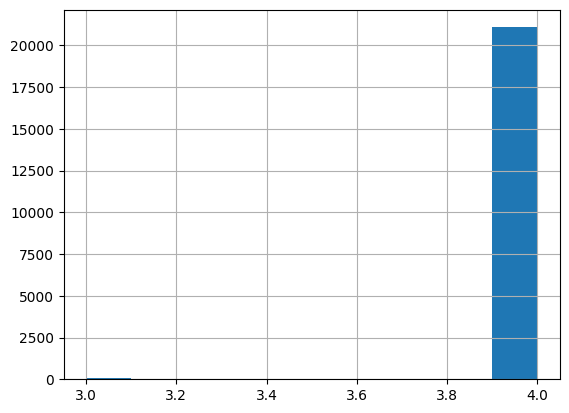

In [210]:
df.nout.hist()